## Данные маркетинговых кампаний

Данные связаны с прямыми маркетинговыми кампаниями португальского банковского учреждения. Маркетинговые кампании были основаны на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы он приобрел продукт т.е. (банковский срочный депозит) подписан ("да") или нет ("нет").

Цель классификации состоит в том, чтобы предсказать, подпишется ли клиент (да/нет) на срочный депозит (переменная y).

Информация о признаках: <br>
<br>
Входные переменные:<br>
данные клиента банка:<br>
1 - age (числовой)<br>
2 - job :  тип работы (категориальный: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown")<br>
3 - marital : семейное положение (категориальное: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (категориальное: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: есть ли дефолт по кредиту? (категориально: "нет", "да", "неизвестно")<br>
6 - housing: есть ли жилищный кредит? (категориально: "нет", "да", "неизвестно")<br>
7 - loan: есть личный заем? (категориально: "нет", "да", "неизвестно")<br>
<br>
Связано с последним контактом в текущей кампании:<br>
8 - contact: тип контактной связи (категориальный: 'cellular','telephone')<br>
9 - month: месяц последнего контакта в году (категория: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: последний контактный день недели (категориальный: 'mon','tue','wed','thu','fri')<br>
11 - duration:  продолжительность последнего контакта в секундах (числовая). Важное примечание: этот атрибут сильно влияет на конечный результат (например, если duration=0, то y='no'). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные следует включать только для целей сравнения и отбрасывать, если предполагается получить реалистичную прогностическую модель.<br>
<br>
Другие атрибуты<br>
12 - campaign: количество контактов, выполненных в ходе этой кампании и для данного клиента (числовое, включая последний контакт)<br>
13 - pdays: количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались)<br>
14 - previous:  количество контактов, выполненных до этой кампании и для этого клиента (числовое значение)<br>
15 - poutcome: результат предыдущей маркетинговой кампании (категорический: 'failure','nonexistent','success')<br>
<br>
Выходная переменная (желаемая цель):<br>
16 - y: оформил ли клиент срочный депозит? (двоичный код: "да", "нет")

## Импортируем нужные библиотеки

In [96]:
import pandas as pd
import numpy as np
import requests, zipfile, io 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [97]:
plt.style.use('tableau-colorblind10')

## Данные

In [98]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

Просматриваем архив и выбираем нужный файл

In [99]:
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

Считываем датасет

In [100]:
df = pd.read_csv(z.open('bank-full.csv'), sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [101]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Видно, что классы у таргета несбалансированы

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [103]:
df["month"] = pd.to_datetime(df.month, format = "%b").dt.month

## 2.EDA

### 2.1 Рассмотрим числовые признаки

In [104]:
df_num = df.select_dtypes(include=['int64'])

In [105]:
num_col=[]
for col in df_num.columns:
    num_col.append(col)

In [106]:
num_col

['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

#### Рассмотрим расспределение числовых признаков

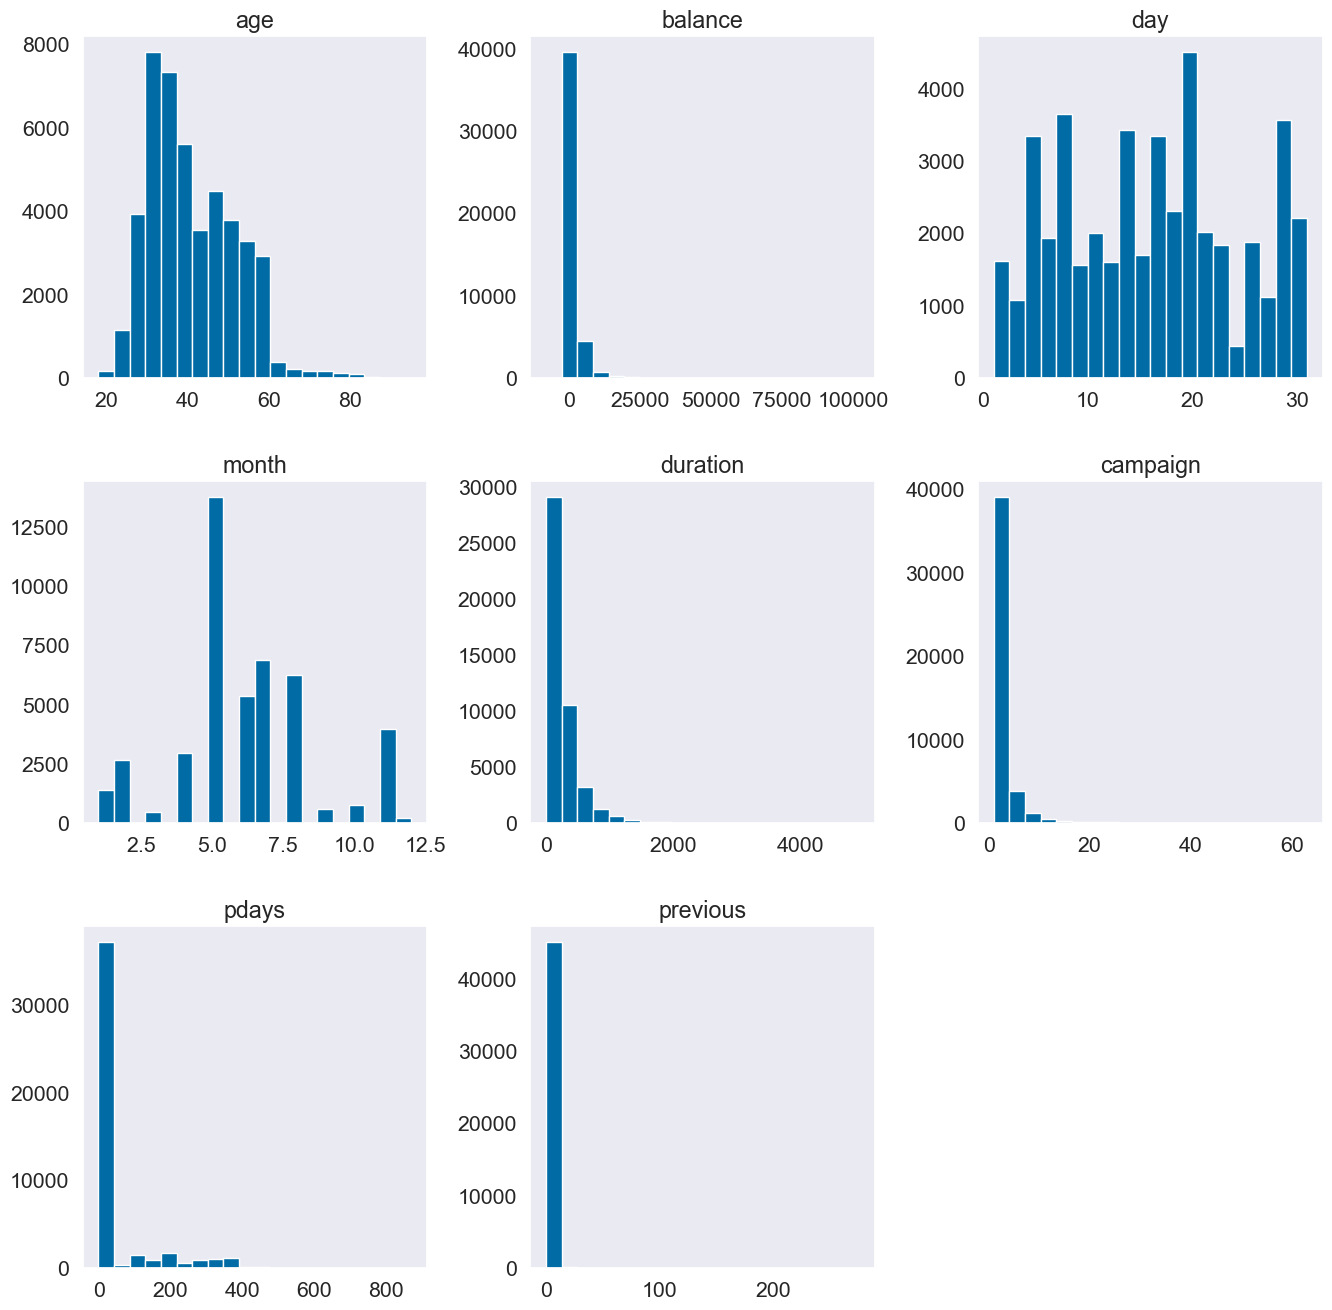

In [107]:
df_num.hist(figsize=(16, 16), bins=20, grid=False);

Признаки balance, duration, pdays, previous, compaign могут иметь выбросы

#### Поссмотрим на выбросы используя boxplot

- balance. Люди могут иметь различный баланс, поэтому скорее всего, это не выбросы

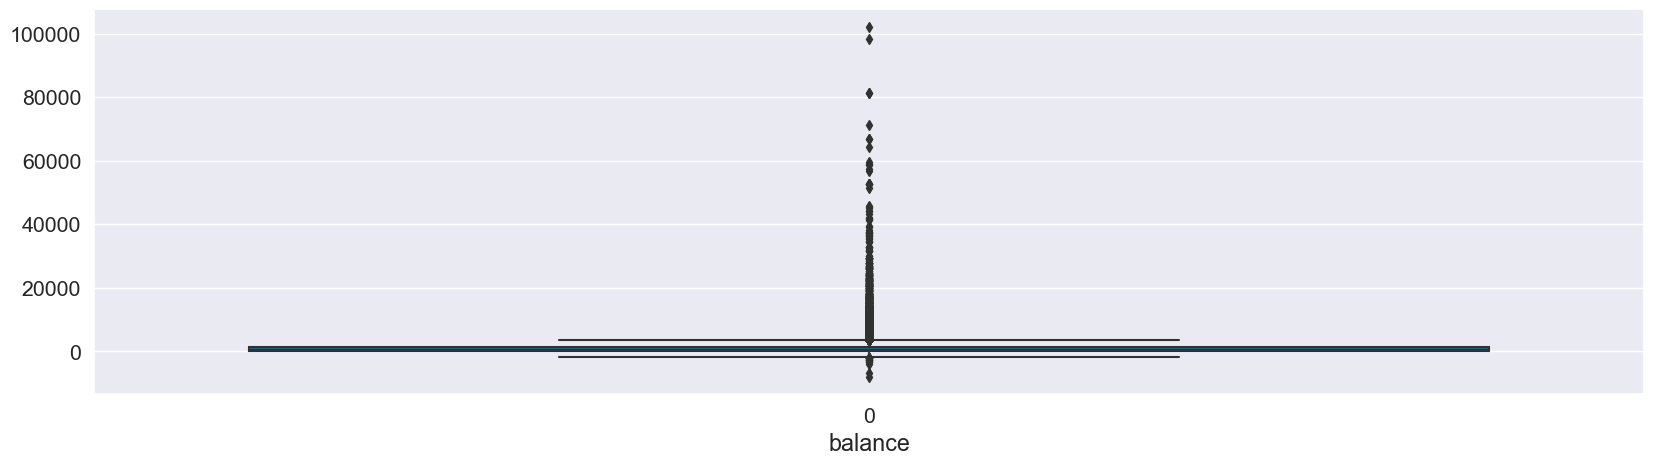

In [108]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['balance'], whis=1.5)

plt.xlabel('balance')
plt.show()

 - Duration - Продолжительность последнего контакта. Скорее всего данная информация является важной, и не явkялется выбросами

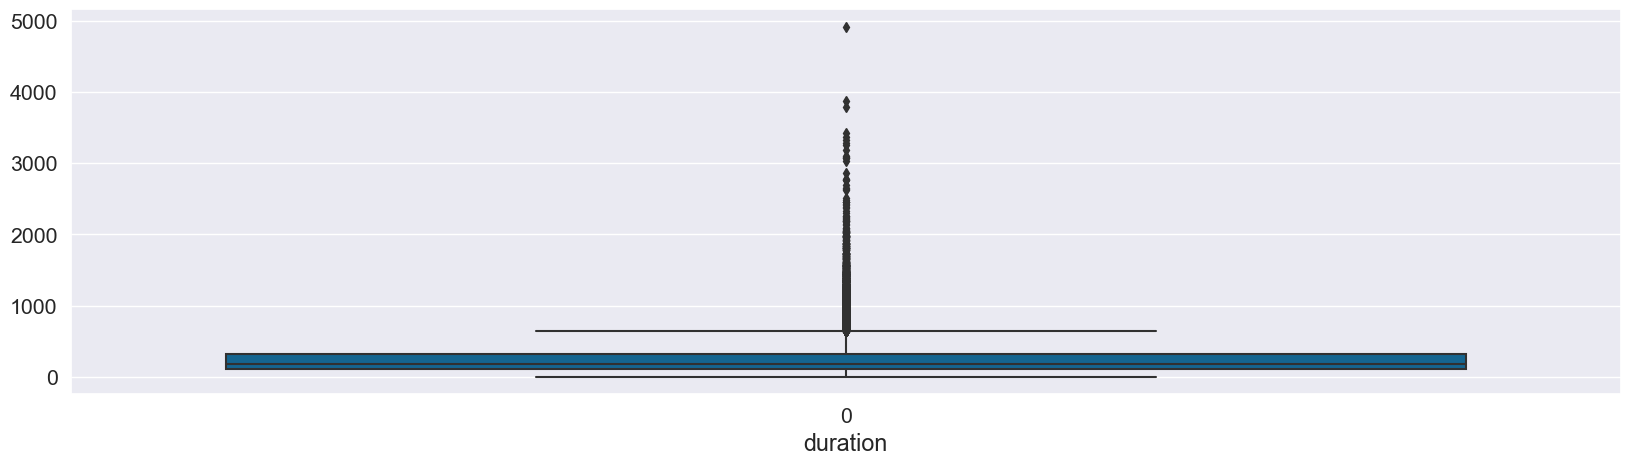

In [109]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['duration'], whis=1.5)

plt.xlabel('duration')
plt.show()

 - pdays - Количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались). Поэтому данные значения скорее всего также не являются выбросами

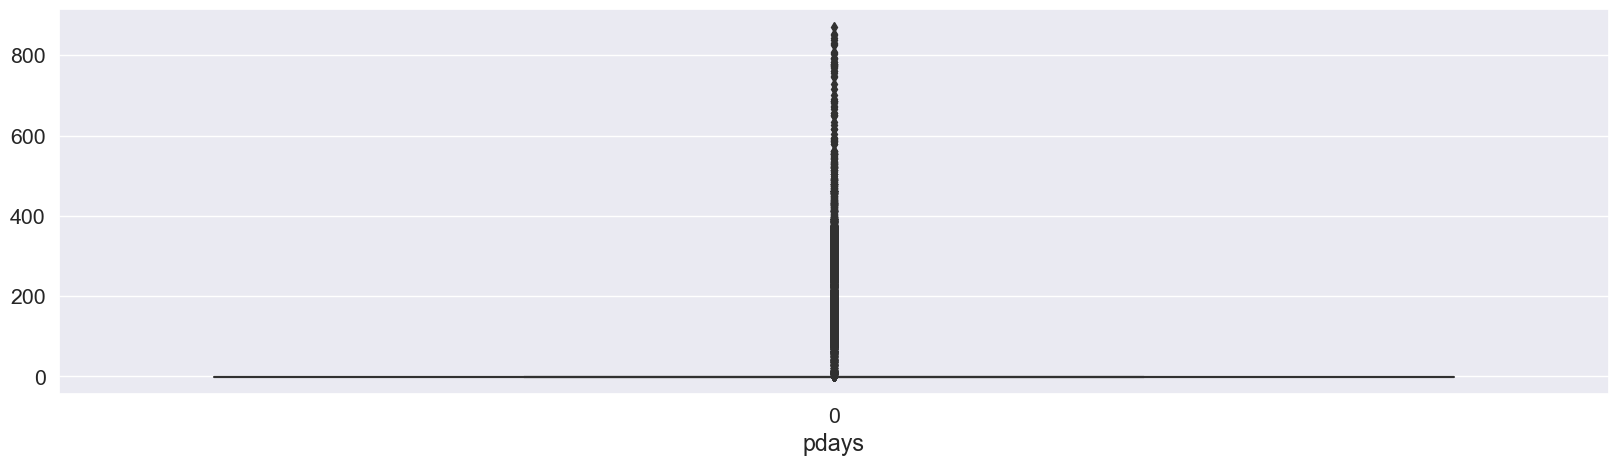

In [110]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['pdays'], whis=1.5)

plt.xlabel('pdays')
plt.show()

- Возраст

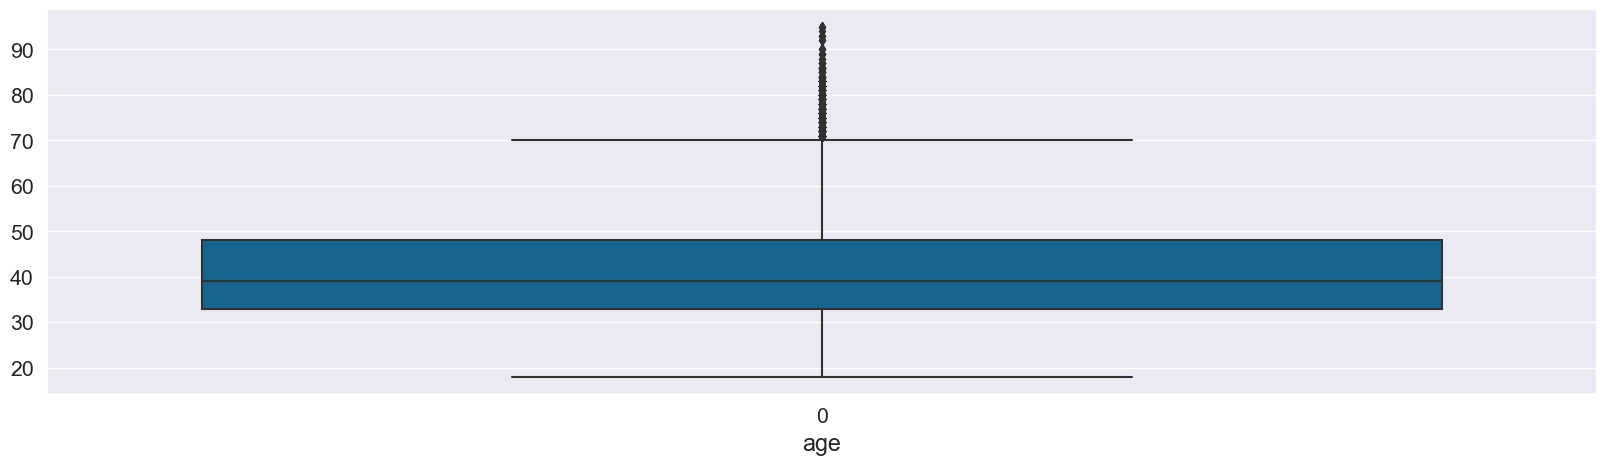

In [111]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['age'], whis=1.5)

plt.xlabel('age')
plt.show()

In [112]:
df = df.loc[df['age'] < 90]

Данные соответсвующие клиентам возраста более 90 лет скорее всего являются выбросами, поскольку в таком возрасте вряд ли человек будет брать депозит

 - previous - количество контактов, выполненных до этой кампании и для этого клиента

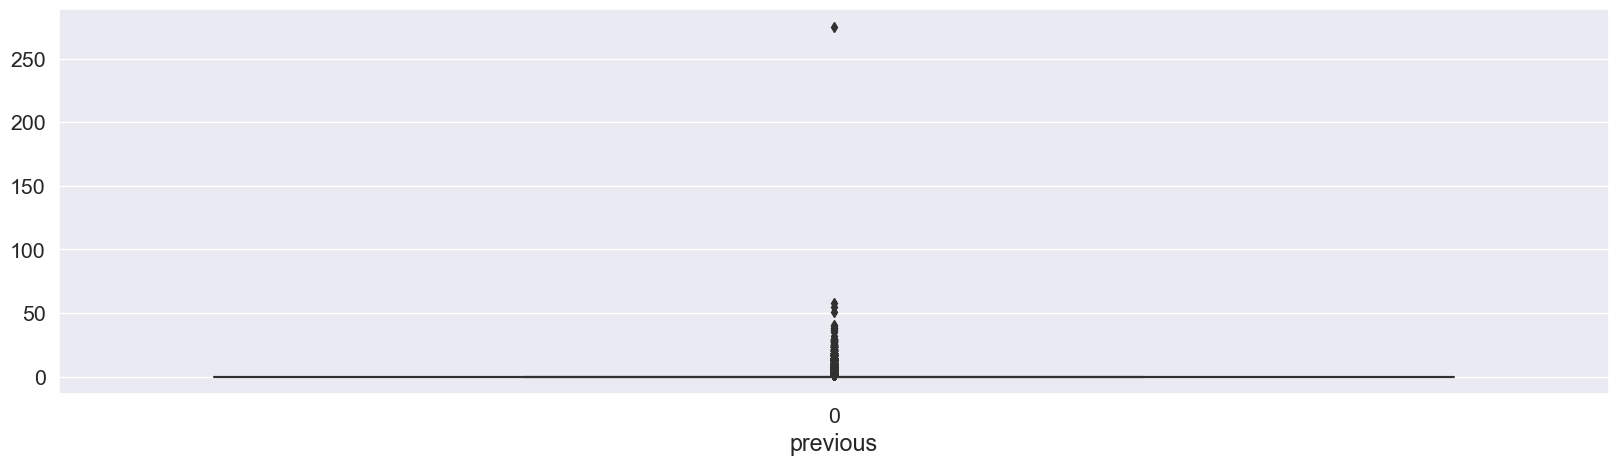

In [113]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['previous'], whis=1.5)

plt.xlabel('previous')
plt.show()

По графику видно выброс, соответстующий значению 300, отсечем его

In [114]:
df = df.loc[df['previous'] < 250]

### Проведем более детальный анализ данных

In [115]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no


#### Рассмотрим динамику охвата рекламных компаний по месяцам

In [116]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

In [117]:
data.head()

,month,count
0,1,1402
1,2,2647
2,3,475
3,4,2931
4,5,13766


 - Создаем линейный график

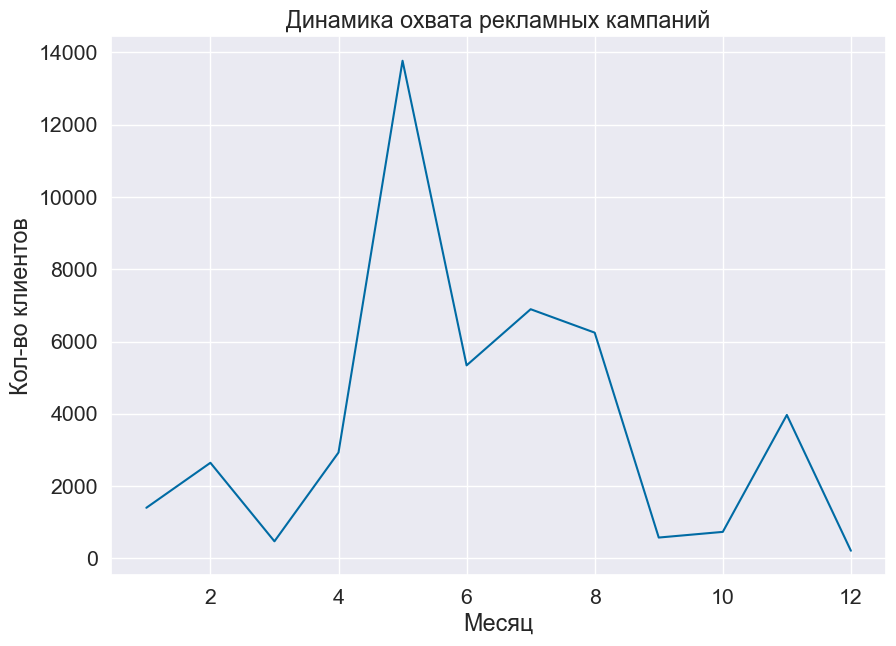

In [118]:
plt.figure(figsize=(10, 7))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

plt.show()

Видно, что максимум клиентов приходится на май, значит, реклама, которая была проведена в мае привлекла большое число людей

#### Рассмотрим, как на динамику охвата влияет то, женат/замужем человек или нет

In [119]:
data1 = df[df['marital'] == 'single'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data2 = df[df['marital'] == 'married'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

Строим два линейных графика с отфильтрованными данными

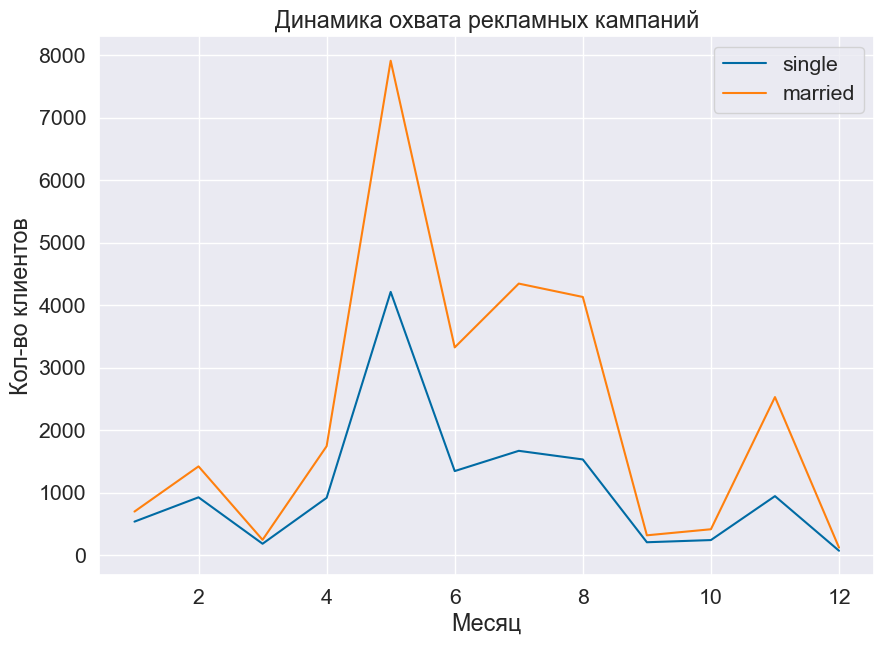

In [120]:
plt.figure(figsize=(10, 7))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single', 'married'])

plt.show()

Наблюдается одинаковая тенденция, с большим охватом в мае и летом. Однако, видно, что охват для женатых людей по всем месяцам выше, в особенности летом, чем для холостых. Что в свою очередь может быть связанно с тем, что люди у которых есть семья, чаще берут кредит на семейные нужды.

#### Строим гистограмму в разрезе возраста клиентов

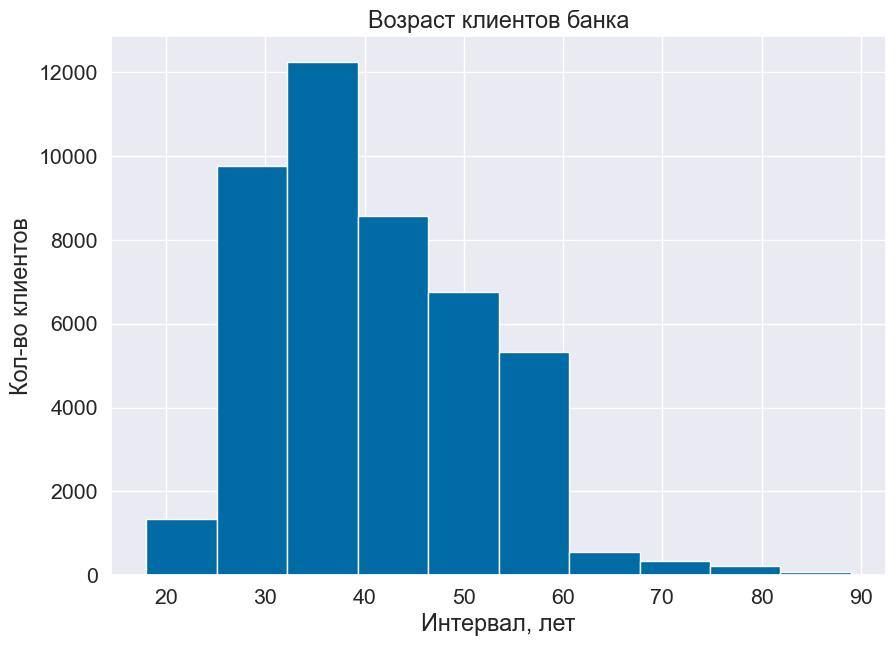

In [121]:
plt.figure(figsize=(10, 7))

plt.hist(df['age'], bins=10)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

plt.show()

Видно, что молодых людей мало, по сравнению со взрослыми. Преобладают люди среднего возраста. Возрастных людей также очень мало

### Рассмотрим связь таргета с другими признаками

#### Строим гистограмму в разрезе людей, взявших и не взявших депозит 

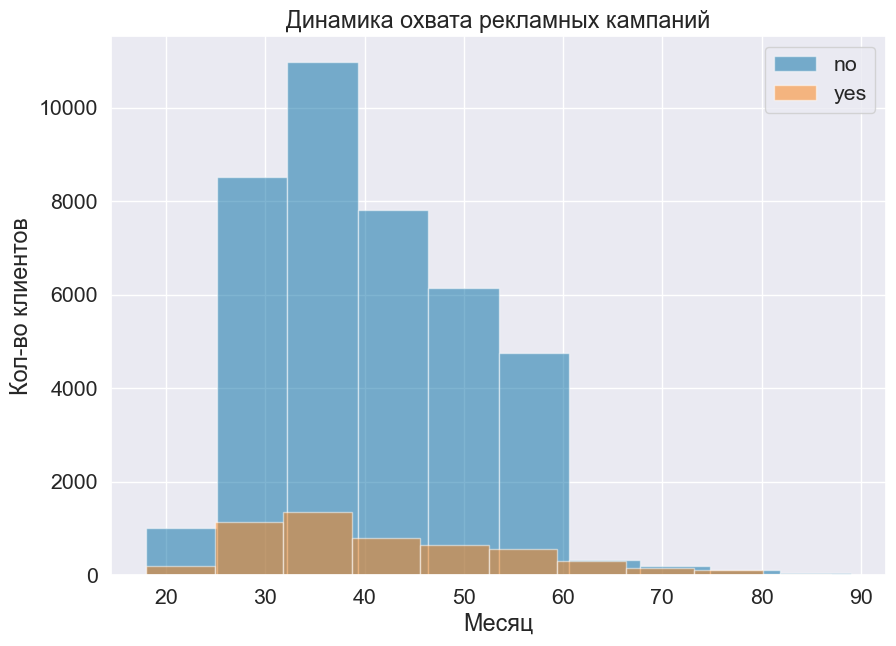

In [122]:
plt.figure(figsize=(10, 7))

plt.hist(df['age'][df['y'] == 'no'], alpha=0.5, label='no')
plt.hist(df['age'][df['y'] == 'yes'], alpha=0.5, label='yes')


plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend()

plt.show()

Распределение по возрастам, тех кто взял депозит и не взял - схоже. Из графика видно, что большинство людей не берут депозит, а чаще берут 30 - 40 летние люди.  

#### Рассмотрим связь длительности звонка и того, взял человек депозит или нет

In [123]:
# Готовим данные для графика
data1 = df['duration'][df['y'] == 'yes']
data2 = df['duration'][df['y'] == 'no']
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

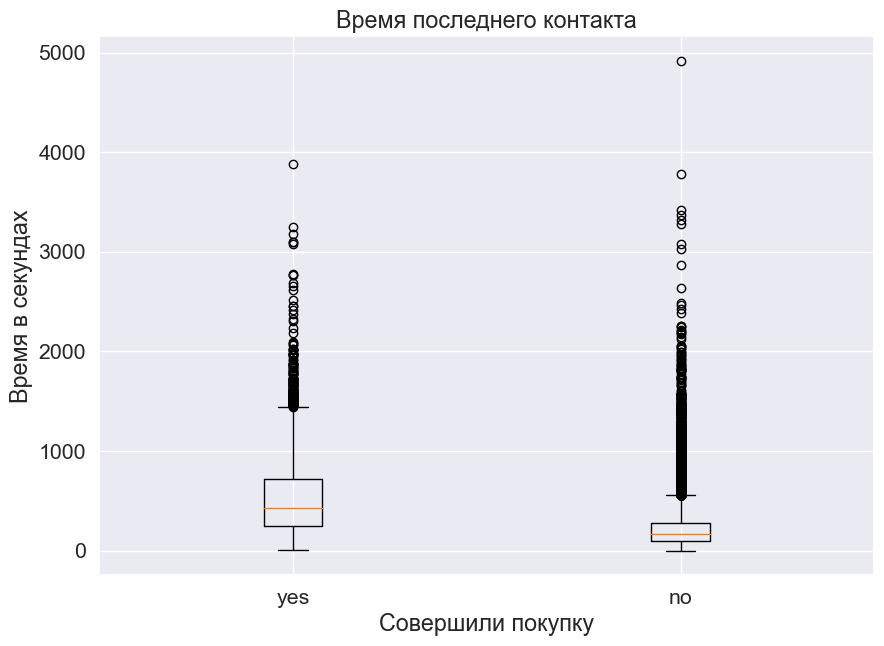

In [124]:
# Строим боксплот

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

plt.show()

Строим боксплот без выбросов 

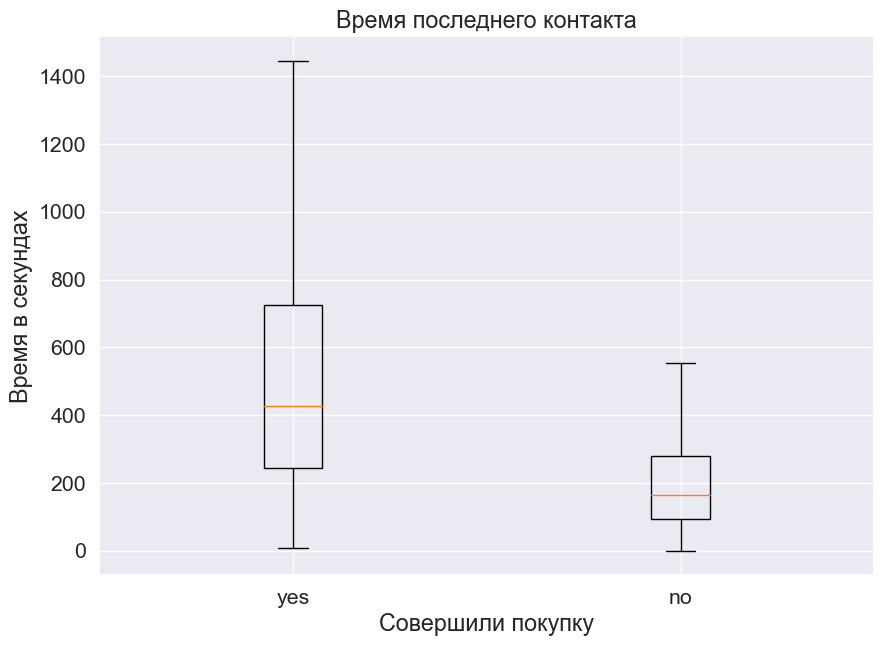

In [125]:
plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

plt.show()

Люди, которые дольше общались с колцентром чаще совершают покупку. Медианное значение времени отличается примерно в 2 раза.

#### Рассмотрим зависимость рода деятельности клиентов от того, приобрели они депозит или нет

In [126]:
data = pd.crosstab(df['job'], df['y'], normalize='index').reset_index().sort_values(by='no', ascending=False)
data.head()

y,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


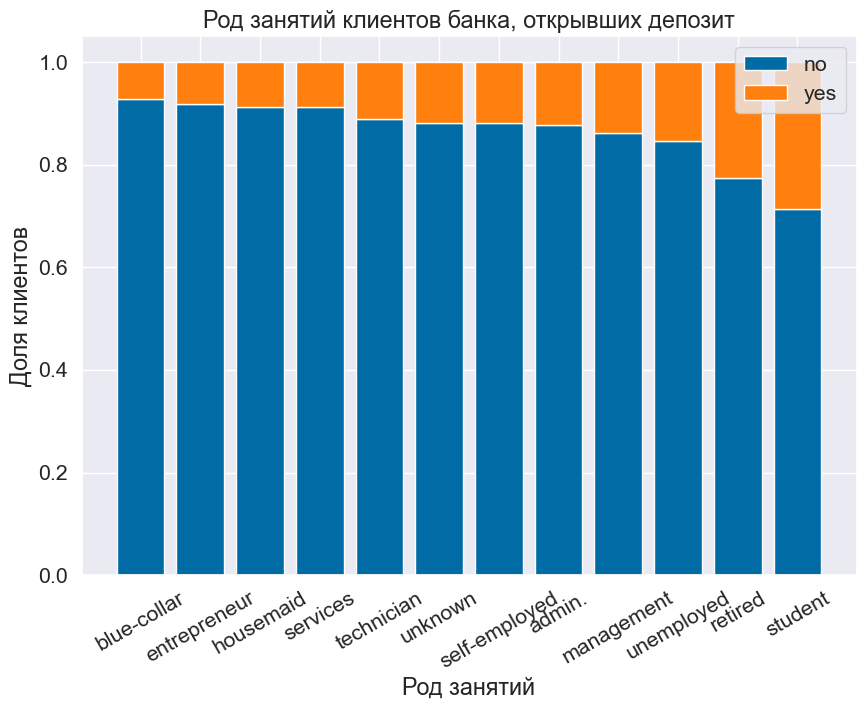

In [127]:
# Строим столбчатую многорядную сложенную диаграмму
plt.figure(figsize=(10, 7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30)

plt.show()

На этой диаграмме видно процентное соотношение того, взяли депозит или нет. Видно, что чаще депозит берут студенты и люди на пенсии.

#### Визуализируем распределение таргета на круговой диаграмме 

In [128]:
# Готовим данные для графика
data = df['y'].value_counts()
data.head()

no     39919
yes     5282
Name: y, dtype: int64

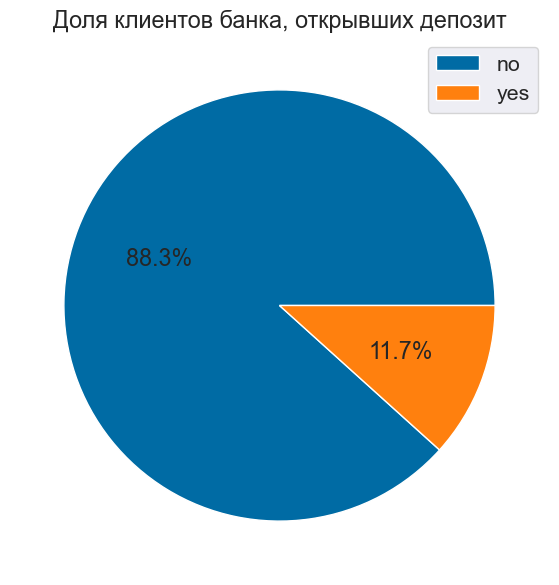

In [129]:
# Строим круговую диаграмму

plt.figure(figsize=(10, 7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index)

plt.show()

### Построим матрицу корреляции с учетом числовых признаков

In [130]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

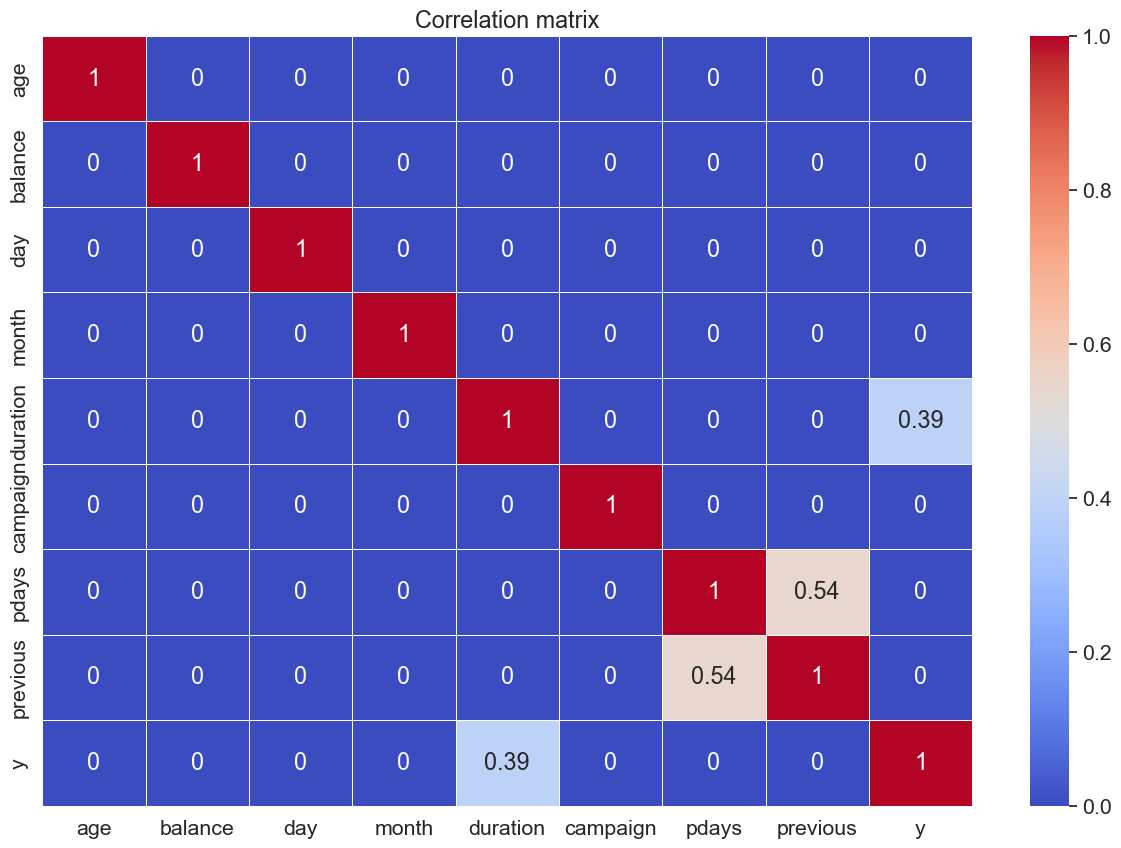

In [131]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Таргет хорошо коррелирует с duration - продолжительностью звонка. Также видна сильная корреляция между признаками pdays и previous, оба связанны с контактами с клиентом.

 ### 3. Обработка данных 

In [132]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,0


In [133]:
df_cat = df.select_dtypes(include=['object'])

In [134]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,poutcome
count,45201,45201,45201,45201,45201,45201,45201,45201
unique,12,3,4,2,2,2,3,4
top,blue-collar,married,secondary,no,yes,no,cellular,unknown
freq,9732,27208,23199,44386,25129,37957,29278,36953


Признаки: default, housing, loan - бинарные

In [135]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [136]:
df["default"]= le.fit_transform(df["default"]) 

In [137]:
df["housing"]= le.fit_transform(df["housing"]) 

In [138]:
df["loan"]= le.fit_transform(df["loan"])

### Посмотрим на матрицу корреляции с учетом этих признаков

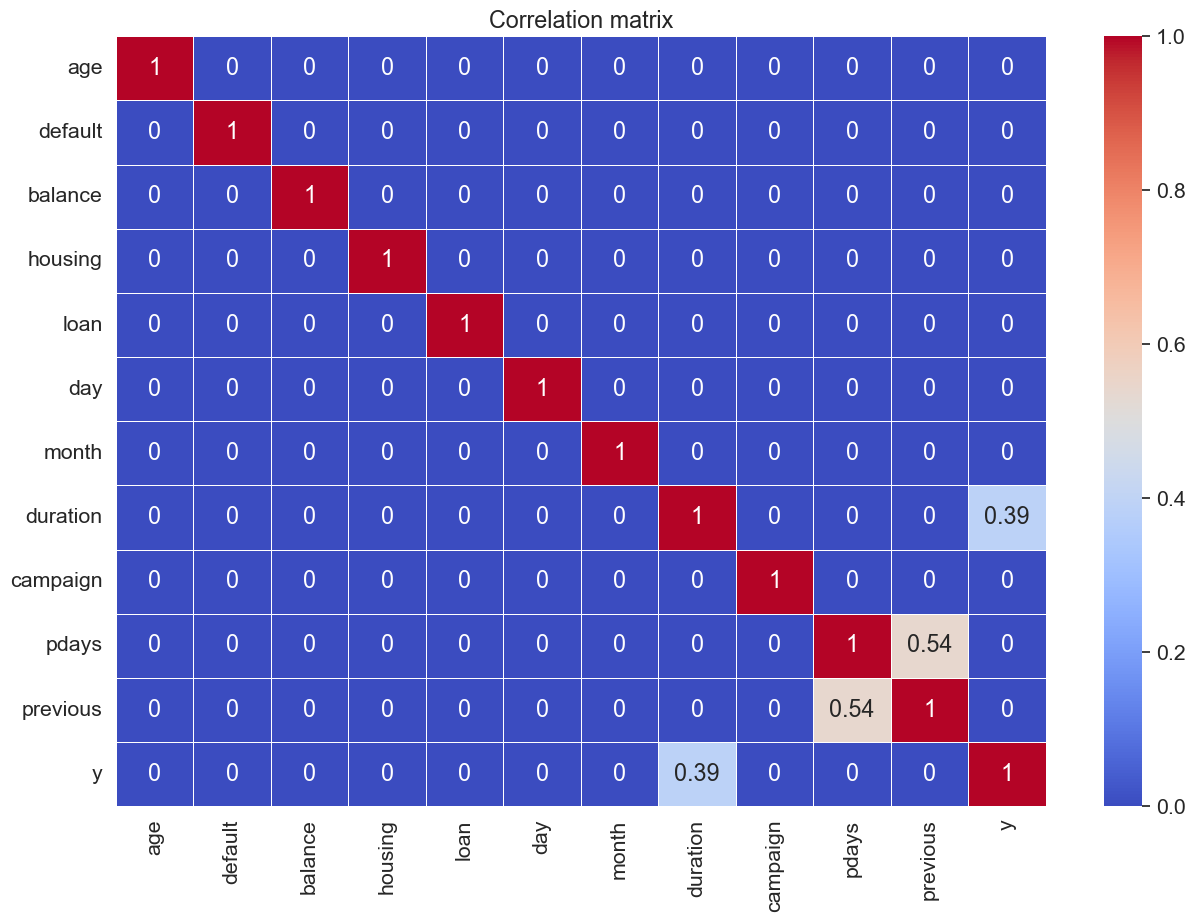

In [139]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Видно, что признаки слабо связаны с таргетом, однако, duration - длительность звонка коррелирует с у, что является логичным, при длительных телефонных переговорах вероятность совершить оформление договора возрастает

Попробуем удалить все числовые столбцы, которые не связаны с таргетом и оставить только категориальные. Оценим модель для обоих случаев (без числовых признаков и с ними)

Применим one-hot-encoding к категориальным данным

In [140]:
df = pd.get_dummies(df, columns=["job", "marital", "education", "contact", "poutcome"])

In [141]:
df.head(5)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


Оставим два датасета - один с учетом числовых признаков, второй без

#### Применим MinMaxScaler к числовым признакам

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
num_col

['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

In [144]:
def get_scale(df,col, model):
    
    scal = model.fit_transform(df[col])
    df[col] = scal
    return df

In [145]:
df = get_scale(df, num_col, MinMaxScaler())

In [146]:
df.head(5)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.563380,0,0.092259,1,0,0.133333,0.363636,0.053070,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1
1,0.366197,0,0.073067,1,0,0.133333,0.363636,0.030704,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
2,0.211268,0,0.072822,1,1,0.133333,0.363636,0.015453,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
3,0.408451,0,0.086476,1,0,0.133333,0.363636,0.018707,0.0,0.0,...,0,0,1,0,0,1,0,0,0,1
4,0.211268,0,0.072812,0,0,0.133333,0.363636,0.040260,0.0,0.0,...,0,0,1,0,0,1,0,0,0,1


In [147]:
df_without = df.copy()

In [148]:
df_without.drop(columns= ["previous", "pdays", "campaign","month", "day", "loan", "housing", "balance", "default", "age"], axis=1, inplace=True)

In [149]:
df_without.head(5)

,duration,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.053070,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0.030704,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0.015453,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0.018707,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0.040260,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


### 4. Разобьем данные на тренировочную и тестовую выборки

In [150]:
import numpy as np
from sklearn.model_selection import train_test_split

In [151]:
y = df_without['y'].values.ravel()

In [152]:
df_without.drop(columns=["y"], axis=1, inplace=True)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(df_without, y, test_size=0.33, random_state=42)

### 5,6,7 Применение алгоритмов и их оценка

### Деревья решений

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
from sklearn import metrics

Рассмотрим качество работы модели на датасете без числовых признаков

In [167]:
tree_clf = DecisionTreeClassifier(max_depth=3)

In [168]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [169]:
y_test_pred = tree_clf.predict(X_test)

In [170]:
print("accuracy: %.1f" % metrics.accuracy_score(y_test, y_test_pred))
print("f1: %.4f" % metrics.f1_score(y_test, y_test_pred))
print("roc_auc: %.4f" % metrics.roc_auc_score(y_test, y_test_pred))

accuracy: 0.9
f1: 0.4698
roc_auc: 0.6756


Рассмотрим качество работы модели на датасете с числовыми признаками

In [171]:
tree_clf_ = DecisionTreeClassifier(max_depth=3)

In [172]:
df.drop(columns=["y"], axis=1, inplace=True)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [174]:
tree_clf_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [175]:
y_test_pred_ = tree_clf_.predict(X_test)

In [176]:
print("accuracy: %.1f" % metrics.accuracy_score(y_test, y_test_pred_))
print("f1: %.4f" % metrics.f1_score(y_test, y_test_pred_))
print("roc_auc: %.4f" % metrics.roc_auc_score(y_test, y_test_pred_))

accuracy: 0.9
f1: 0.4698
roc_auc: 0.6756


Видно, что качество модели на обоих датасетах одинакого, значит, связи между числовыми признаками (кроме duration) и таргетом - нет

Посмотрим на лучшие гиперпараметры

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3,4,5,6,7,8,9,10, None]}

In [161]:
rfr = DecisionTreeClassifier(max_depth=1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 3, return_train_score=True)

In [162]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ...max_depth=3;, score=(train=0.901, test=0.897) total time=   0.0s
[CV 2/3] END ...max_depth=3;, score=(train=0.901, test=0.896) total time=   0.0s
[CV 3/3] END ...max_depth=3;, score=(train=0.899, test=0.904) total time=   0.0s
[CV 1/3] END ...max_depth=4;, score=(train=0.903, test=0.896) total time=   0.0s
[CV 2/3] END ...max_depth=4;, score=(train=0.902, test=0.898) total time=   0.0s
[CV 3/3] END ...max_depth=4;, score=(train=0.900, test=0.898) total time=   0.0s
[CV 1/3] END ...max_depth=5;, score=(train=0.906, test=0.899) total time=   0.0s
[CV 2/3] END ...max_depth=5;, score=(train=0.904, test=0.898) total time=   0.0s
[CV 3/3] END ...max_depth=5;, score=(train=0.906, test=0.899) total time=   0.0s
[CV 1/3] END ...max_depth=6;, score=(train=0.909, test=0.898) total time=   0.0s
[CV 2/3] END ...max_depth=6;, score=(train=0.908, test=0.898) total time=   0.0s
[CV 3/3] END ...max_depth=6;, score=(train=0.910,

Лучшее качество при параметре 'max_depth': 3

Для случая несбалансированных классов для оценки модели лучше использовать F1 score поскольку с помощью него мы можем оценить как часто алгоритм совершает ложноположительные и ложноотрицательные предсказания. В нешем случае accuracy имеет довольно высокое значение - 0.9, но она не отражает реального качества работы алгоритма, поскольку применяется для сбалансированных классов. F1 имеет более низкое значение, что говорит, либо о том что, дерево недостаточно хорошо смогло уловить необходимые зависимости и лучше использовать ансамблевые алгоритмы, либо связь признаков с таргетом слишком мала, поэтому алгоритм показывает не самое хорошее качество.